In [1]:
import pandas as pd
from utils.constants import Paths

In [2]:
df = pd.read_parquet(Paths.PROCESSED_DATA_PARQUET / "aggregated_pothole.parquet")
housing_df = pd.read_parquet(Paths.PROCESSED_DATA_PARQUET / "aggregated_housing_code.parquet")

In [3]:
df.loc[df.num_requests == -1, "num_requests"] = 0
housing_df.loc[housing_df.num_requests == -1, "num_requests"] = 0

In [4]:
describe_columns = [
    "response_time",
    "num_requests",
    "population_density",
    "median_age",
    "hispanic_pct",
    "white_nh_pct",
    "black_nh_pct",
    "asian_nh_pct",
    #"other_nh_pct",
    #"two_plus_nh_pct",
    "average_hh_size",
    "less_than_hs_pct",
    "hs_pct",
    "some_college_pct",
    "associate_degree_pct",
    "bachelors_or_higher_pct",
    "median_household_income",
    "median_income_black",
    "median_income_native",
    "median_income_asian",
    #"median_income_pacific_islander",
    "median_income_other",
    "median_income_two_plus",
    "median_income_white",
    "median_income_hispanic",
]

education_demographics = [
    "less_than_hs_pct",
    "hs_pct",
    "some_college_pct",
    "associate_degree_pct",
    "bachelors_or_higher_pct",
]

race_demographics = [
    "hispanic_pct",
    "white_nh_pct",
    "black_nh_pct",
    "asian_nh_pct",
    # "other_nh_pct",
    # "two_plus_nh_pct",
]

income_demographics = [
    "median_household_income",
    "median_income_black",
    "median_income_native",
    "median_income_asian",
    #"median_income_pacific_islander",
    "median_income_other",
    "median_income_two_plus",
    "median_income_white",
    "median_income_hispanic",
]

misc_demographics = [
    "average_hh_size",
    "median_age",
    "population_density",
]

In [5]:
df= df.drop(columns=["other_nh_pct", "two_plus_nh_pct"])

## Exploratory Data Analysis


In [6]:
df[describe_columns].describe()

,response_time,num_requests,population_density,median_age,hispanic_pct,white_nh_pct,black_nh_pct,asian_nh_pct,average_hh_size,less_than_hs_pct,...,associate_degree_pct,bachelors_or_higher_pct,median_household_income,median_income_black,median_income_native,median_income_asian,median_income_other,median_income_two_plus,median_income_white,median_income_hispanic
count,506876.000000,506876.000000,506876.000000,505393.000000,503941.000000,500455.000000,499856.000000,497105.000000,501304.000000,493984.000000,...,493984.000000,493984.000000,483024.000000,213543.000000,4224.000000,289437.000000,210041.000000,220915.000000,361115.000000,340981.000000
mean,4.162560,0.017841,7180.931663,38.580955,25.570898,35.594987,18.297352,16.021586,2.710643,15.606874,...,6.666063,39.764402,92933.654135,78674.777319,87858.774148,114066.651575,77105.129437,113477.835249,114530.007361,87902.718216
std,16.752113,0.164137,6012.228727,6.204919,19.811203,28.201013,23.872390,16.752201,0.750810,10.887412,...,4.037782,21.596733,43195.711258,45774.132333,51269.686617,58327.280655,48917.481311,64711.816623,49317.810942,52265.335925
min,0.000000,0.000000,0.000000,0.500000,0.600000,0.200000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,11406.000000,2499.000000,18292.000000,2499.000000,2499.000000,2499.000000,6518.000000,2499.000000
25%,0.000000,0.000000,2633.760940,34.700000,10.800000,6.600000,1.800000,4.300000,2.330000,7.100000,...,3.800000,24.200000,63352.000000,47760.000000,58864.000000,72981.000000,44270.000000,64393.000000,80625.000000,50750.000000
50%,1.000000,0.000000,5535.266783,38.100000,17.800000,32.200000,5.700000,9.700000,2.740000,13.400000,...,6.300000,35.400000,87687.000000,69848.000000,90951.000000,100500.000000,65726.000000,98009.000000,107929.000000,75063.000000
75%,4.000000,0.000000,10170.761188,42.100000,35.800000,61.400000,27.000000,22.600000,3.040000,22.000000,...,9.000000,50.200000,114750.000000,97888.000000,94886.000000,141250.000000,97097.000000,151970.000000,142576.000000,111324.000000
max,3652.000000,17.000000,47718.236141,83.000000,100.000000,100.000000,90.900000,90.600000,19.000000,66.700000,...,53.300000,100.000000,250001.000000,250001.000000,250001.000000,250001.000000,250001.000000,250001.000000,250001.000000,250001.000000


### Correlation Matrix


In [7]:
df[describe_columns].corr()[["response_time", "num_requests"]]

,response_time,num_requests
response_time,1.000000,-0.016384
num_requests,-0.016384,1.000000
population_density,0.001645,0.004969
median_age,0.002705,-0.003849
hispanic_pct,-0.014147,0.008501
white_nh_pct,0.029337,-0.010719
black_nh_pct,-0.006461,0.007787
asian_nh_pct,-0.020468,-0.003911
average_hh_size,-0.001719,0.001530
less_than_hs_pct,-0.010621,0.006482


### Most significant correlations


In [8]:
import matplotlib.pyplot as plt

In [9]:
# positive correlation
df[describe_columns].corr()[["response_time", "num_requests"]].unstack().sort_values(
    ascending=False
).drop_duplicates()

response_time  response_time              1.000000
               white_nh_pct               0.029337
num_requests   median_income_native       0.022116
response_time  hs_pct                     0.009015
num_requests   hispanic_pct               0.008501
               black_nh_pct               0.007787
               median_income_white        0.007118
               less_than_hs_pct           0.006482
               population_density         0.004969
response_time  some_college_pct           0.002894
               median_age                 0.002705
num_requests   bachelors_or_higher_pct    0.002377
response_time  median_income_asian        0.002262
num_requests   median_income_asian        0.001901
response_time  population_density         0.001645
num_requests   average_hh_size            0.001530
response_time  median_income_hispanic     0.001395
num_requests   median_income_two_plus     0.001208
response_time  median_household_income    0.001079
               bachelors_or_hig

In [10]:
# negative correlation
df[describe_columns].corr()[["response_time", "num_requests"]].unstack().sort_values(
    ascending=True
).drop_duplicates()

response_time  median_income_native      -0.049589
               asian_nh_pct              -0.020468
               num_requests              -0.016384
               hispanic_pct              -0.014147
               median_income_black       -0.013112
num_requests   white_nh_pct              -0.010719
response_time  less_than_hs_pct          -0.010621
num_requests   hs_pct                    -0.006524
response_time  black_nh_pct              -0.006461
               median_income_other       -0.005521
num_requests   associate_degree_pct      -0.005475
               some_college_pct          -0.004227
               median_income_hispanic    -0.004095
               asian_nh_pct              -0.003911
               median_age                -0.003849
response_time  median_income_white       -0.003594
num_requests   median_income_other       -0.002206
               median_household_income   -0.001964
response_time  average_hh_size           -0.001719
               associate_degree

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [12]:
df = df.reset_index(drop=True)

In [13]:
df['predominant_race'] = df[race_demographics].idxmax(axis=1)

/var/folders/_f/vkg_0cs10979h47nv_958bdw0000gp/T/ipykernel_89597/3510043899.py:1: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  df['predominant_race'] = df[race_demographics].idxmax(axis=1)


In [14]:
for race_column in race_demographics:
    df[race_column] = df[race_column].fillna(df[race_column].mean())
for ed_column in education_demographics:
    df[ed_column] = df[ed_column].fillna(df[ed_column].mean())
for income_column in income_demographics:
    df[income_column] = df[income_column].fillna(df[income_column].mean())

In [15]:
duplicate_groups = df.groupby('neighborhood')['num_requests'].mean().reset_index()

In [16]:
def plot_requests_by_race(df, race_columns):
    num_bins = 10
    plt.figure(figsize=(15,10))
    
    if not isinstance(race_columns, list):
        race_columns = [race_columns]
    
    for i, race in enumerate(race_columns):
        plt.subplot(len(race_columns), 1, i+1)
        df[f'{race}_binned'] = pd.cut(df[race], bins=num_bins, include_lowest=True)
        
        binned_stats = df.groupby(f'{race}_binned').agg(
            mean_num_requests=('num_requests', 'mean'), 
            std_num_requests=('num_requests', 'std')
        ).reset_index()

        binned_stats[f'{race}_mid'] = binned_stats[f'{race}_binned'].apply(lambda x: x.mid)

        sns.lineplot(x=f'{race}_mid', y='mean_num_requests', data=binned_stats, label='Mean')
        sns.lineplot(x=f'{race}_mid', y='std_num_requests', data=binned_stats, label='Std Dev')
        plt.xlabel(f'Percentage of {race.split("_")[0]} Residents')
        plt.ylabel('Number of Requests')
        plt.title(f'Mean and Std Dev of Number of Requests vs. {race.replace("_", " ").replace("pct", "percentage")}')
        
    plt.tight_layout()
    plt.show()

In [18]:
df.sort_values(by='num_requests', ascending=False).head()

,date_created,date_closed,response_time,num_requests,borough,neighborhood,zip_code,street,population_density,geo_id,...,median_household_income,median_income_black,median_income_native,median_income_asian,median_income_pacific_islander,median_income_other,median_income_two_plus,median_income_white,median_income_hispanic,predominant_race
206641,2016-02-29 09:39:59,2016-03-01 12:35:00,1,17,Queens,Flushing-Willets Point,11354,"ROOSEVELT AVENUE, MAIN STREET, PRINCE STREET",6185.742196,36081087100,...,46841.0,78674.777319,87858.774148,51111.000000,NaN,43421.000000,113477.835249,156703.000000,41375.0,asian_nh_pct
134163,2016-06-07 13:50:26,2016-06-08 08:34:00,0,10,Manhattan,East Village,10009,"EAST 4 STREET, AVENUE C, AVENUE D",14580.920802,36061002601,...,35625.0,78674.777319,87858.774148,29667.000000,NaN,45855.000000,45481.000000,114530.007361,45393.0,hispanic_pct
411263,2012-04-12 10:14:55,2012-04-13 00:50:00,0,10,Brooklyn,Park Slope,11215,"9 STREET, 5 AVENUE, 6 AVENUE",10510.705672,36047013900,...,163125.0,75938.000000,87858.774148,114066.651575,NaN,77105.129437,154850.000000,175909.000000,70972.0,white_nh_pct
453544,2018-07-30 14:18:30,2018-07-31 08:30:00,0,9,Manhattan,Harlem (North),10030,"WEST 136 STREET, 7 AVENUE, LENOX AVENUE",14190.607504,36061022800,...,85050.0,81607.000000,87858.774148,114066.651575,NaN,77105.129437,113477.835249,93987.000000,85313.0,black_nh_pct
187281,2015-01-05 05:51:30,2015-01-05 20:35:00,0,8,Brooklyn,Carroll Gardens-Cobble Hill-Gowanus-Red Hook,11215,"2 AVENUE, 6 STREET, 6 STREET",1450.761842,36047011901,...,134167.0,78674.777319,87858.774148,250001.000000,NaN,77105.129437,132708.000000,170139.000000,103125.0,white_nh_pct


/var/folders/_f/vkg_0cs10979h47nv_958bdw0000gp/T/ipykernel_62470/2846221558.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{race}_binned'] = pd.cut(df[race], bins=num_bins, include_lowest=True)
/var/folders/_f/vkg_0cs10979h47nv_958bdw0000gp/T/ipykernel_62470/2846221558.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_stats = df.groupby(f'{race}_binned').agg(
/var/folders/_f/vkg_0cs10979h47nv_958bdw0000gp/T/ipykernel_62470/2846221558.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

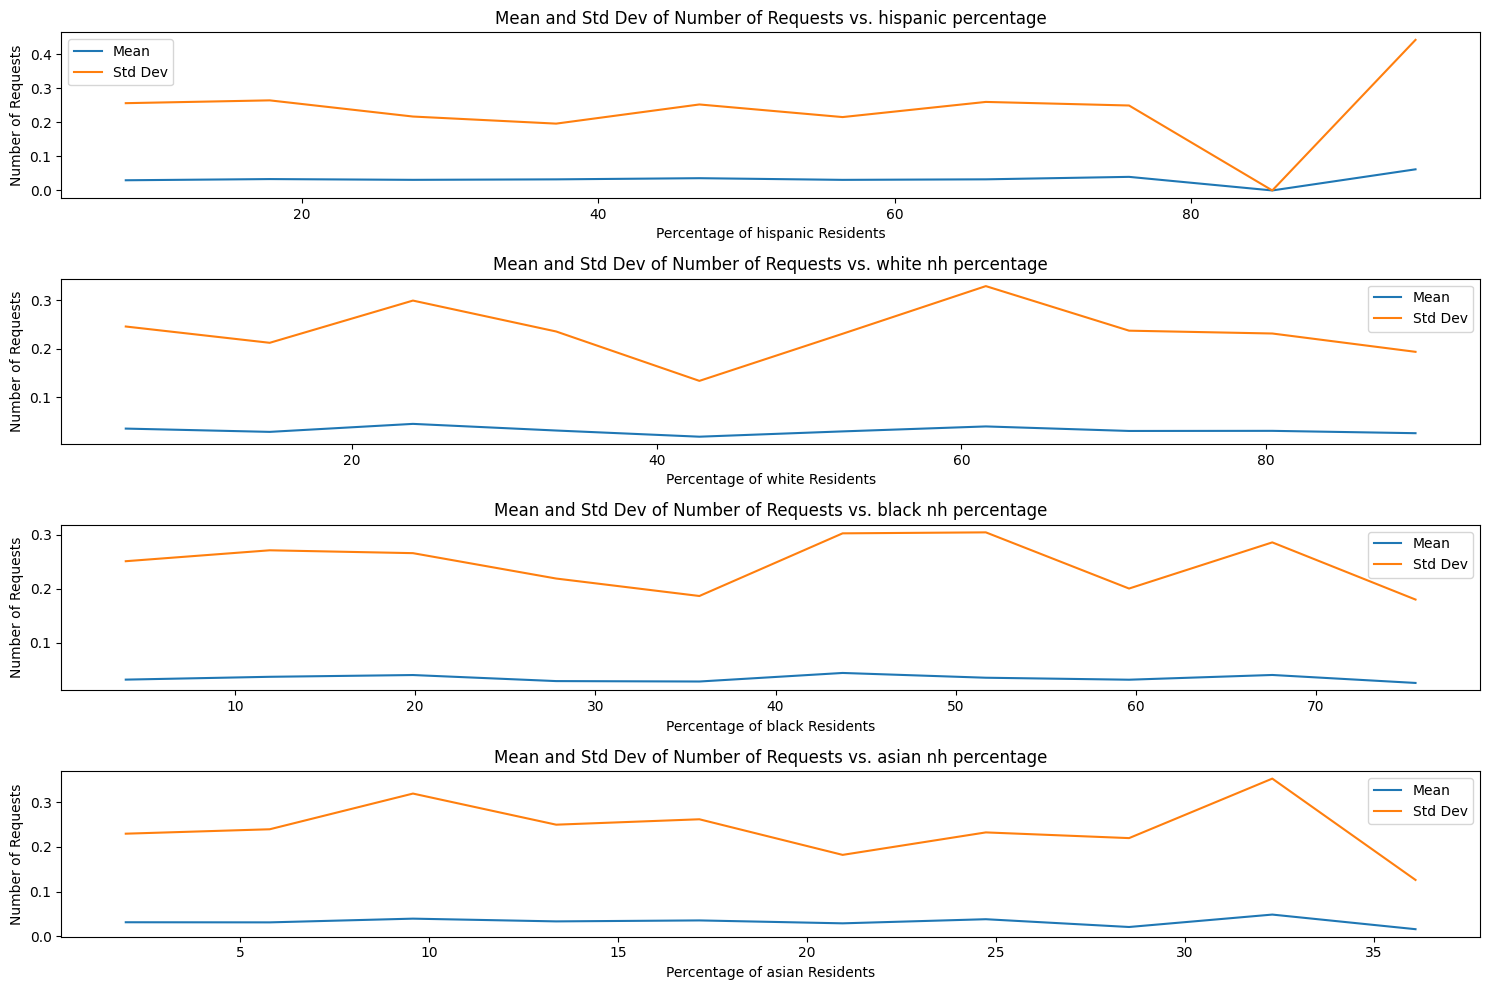

In [38]:
threshold = 100
neighborhoods_thresholded = duplicate_groups.sort_values('num_requests', ascending=False).head(20)['neighborhood']
#neighborhoods_thresholded = duplicate_groups.sort_values(by='num_requests', ascending=False)['neighborhood']
plot_requests_by_race(df[df['neighborhood'].isin(neighborhoods_thresholded)], race_demographics)

In [19]:
import statsmodels.api as sm

In [36]:
X = sm.add_constant(df)


model = sm.OLS(X['num_requests'], X[race_demographics + education_demographics + income_demographics])
results = model.fit()


In [37]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:           num_requests   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):              0.012
Method:                 Least Squares   F-statistic:                              364.3
Date:                Tue, 05 Mar 2024   Prob (F-statistic):                        0.00
Time:                        10:22:43   Log-Likelihood:                      1.9683e+05
No. Observations:              506876   AIC:                                 -3.936e+05
Df Residuals:                  506859   BIC:                                 -3.934e+05
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------